### SPRINT 6

1.import the files
2.study the data they contain
3.make sure the data types are correct
4.identify the top 10 neighborhoods in terms of drop-offs
5.make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
6.draw conclusions based on each graph and explain the results

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b>
    
Introduction was specified, good job
</div>

In [ ]:
#Loading all the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind


### Load Data

In [ ]:
#load the data flies into Dataframes
df_Hare = pd.read_csv('/datasets/project_sql_result_07.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/project_sql_result_07.csv'

In [ ]:
df_company_name = pd.read_csv('/datasets/project_sql_result_01.csv')

In [ ]:
df_company_name.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [ ]:
df_dropoff_location_name = pd.read_csv('/datasets/project_sql_result_04.csv')

In [ ]:
df_dropoff_location_name.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


### info

In [ ]:
df_company_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
df_dropoff_location_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b>
    
Column names and missing values were checked, good job
</div>

### Fix data

In [ ]:
# Strip any leading or trailing spaces from the column names
df_company_name.columns = df_company_name.columns.str.strip()

# Strip leading and trailing spaces from the company names
df_company_name['company_name'] = df_company_name['company_name'].str.strip()

# Remove any duplicate rows
df_company_name = df_company_name.drop_duplicates()

# Check for full duplicates
full_duplicates_count_company = df_company_name.duplicated().sum()

# Check for and drop rows with missing values
df_company_name = df_company_name.dropna()

# Check and convert 'trips_amount' to integers (in case there are any anomalies)
df_company_name['trips_amount'] = pd.to_numeric(df_company_name['trips_amount'], errors='coerce')

# Drop any rows where 'trips_amount' is NaN after conversion
df_company_name = df_company_name.dropna(subset=['trips_amount'])

# Convert 'trips_amount' back to integer type
df_company_name['trips_amount'] = df_company_name['trips_amount'].astype(int)

<div class="alert alert-danger"; style="border-left: 7px solid red">
<b>⛔️ Reviewer's comment, v. 1</b>
    
Please, pay attention that we also should check data for full duplicates with help of `duplicated().sum()` in the preprocessing

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 2</b>
    
Great!

In [ ]:
# Strip any leading or trailing spaces from the column names
df_dropoff_location_name.columns = df_dropoff_location_name.columns.str.strip()

# Strip leading and trailing spaces from the dropoff_location_name values
df_dropoff_location_name['dropoff_location_name'] = df_dropoff_location_name['dropoff_location_name'].str.strip()

# Remove any duplicate rows
df_dropoff_location_name = df_dropoff_location_name.drop_duplicates()

# Check for and drop rows with missing values
df_dropoff_location_name = df_dropoff_location_name.dropna()

# Convert 'average_trips' to numeric values and handle errors if any
df_dropoff_location_name['average_trips'] = pd.to_numeric(df_dropoff_location_name['average_trips'], errors='coerce')

# Drop any rows where 'average_trips' is NaN after conversion
df_dropoff_location_name = df_dropoff_location_name.dropna(subset=['average_trips'])

In [ ]:
#display New df_company_name
display(df_company_name)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [ ]:
#display new df_dropoff_location_name
display(df_dropoff_location_name)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [ ]:
# Get the top 10 neighborhoods based on average drop-offs
top_10_dropoffs = df_dropoff_location_name.sort_values(by='average_trips', ascending=False).head(10)

In [ ]:
# Display the top 10 neighborhoods by dropoff
display(top_10_dropoffs)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


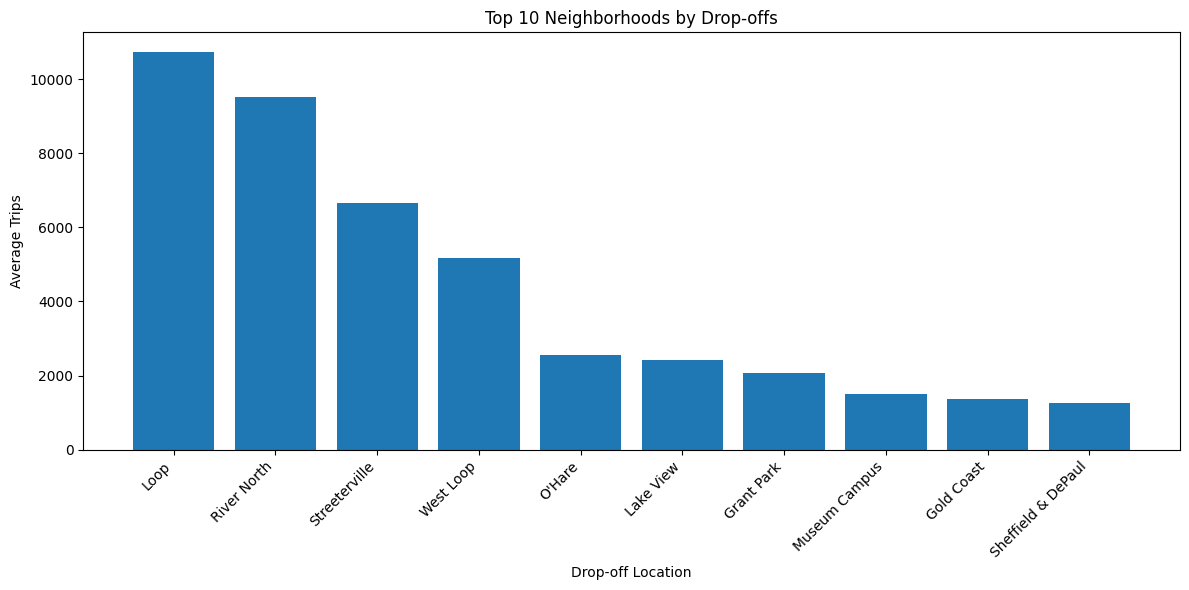

In [ ]:
# Create a bar graph for the top 10 drop-off neighborhoods
plt.figure(figsize=(12, 6))
plt.bar(top_10_dropoffs['dropoff_location_name'], top_10_dropoffs['average_trips'])
plt.xlabel('Drop-off Location')
plt.ylabel('Average Trips')
plt.title('Top 10 Neighborhoods by Drop-offs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b>
    
Yep, very nice!
</div>

### Conclusion for Top 10 Neighborhoods by Drop-offs

 1.High Drop-off Activity in Central Areas:

The Loop and River North neighborhoods see the highest number of drop-offs, indicating that these areas are central hubs for business, tourism, and commuting.

These locations likely attract a lot of traffic due to office buildings, shopping areas, restaurants, and other attractions.

2.Streeterville and West Loop Also Popular:

Streeterville and West Loop follow closely behind, suggesting that they are also key destinations for commuters and tourists.

These areas may host a mix of residential and commercial establishments, contributing to high drop-off volumes.

3.O’Hare as a Key Transportation Hub:

O'Hare International Airport is ranked among the top 5, reflecting its status as a major transportation hub.

Many trips likely originate from or terminate at the airport, contributing significantly to the drop-off volume.

4.Decline in Drop-offs Beyond Central Areas:

There is a noticeable drop in the average number of trips beyond the top 4-5 locations, suggesting that the outer neighborhoods and suburban areas see comparatively lower traffic.

5.Potential Impact on Transportation Planning:

These insights could be valuable for transportation authorities and taxi companies in allocating resources efficiently, with a focus on high-demand areas.

In [ ]:
# Get the top 10 companies based on trips_amount
top_10_companies = df_company_name.sort_values(by='trips_amount', ascending=False).head(10)

In [ ]:
#Display the top 10 companies based on trips
display(top_10_companies)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


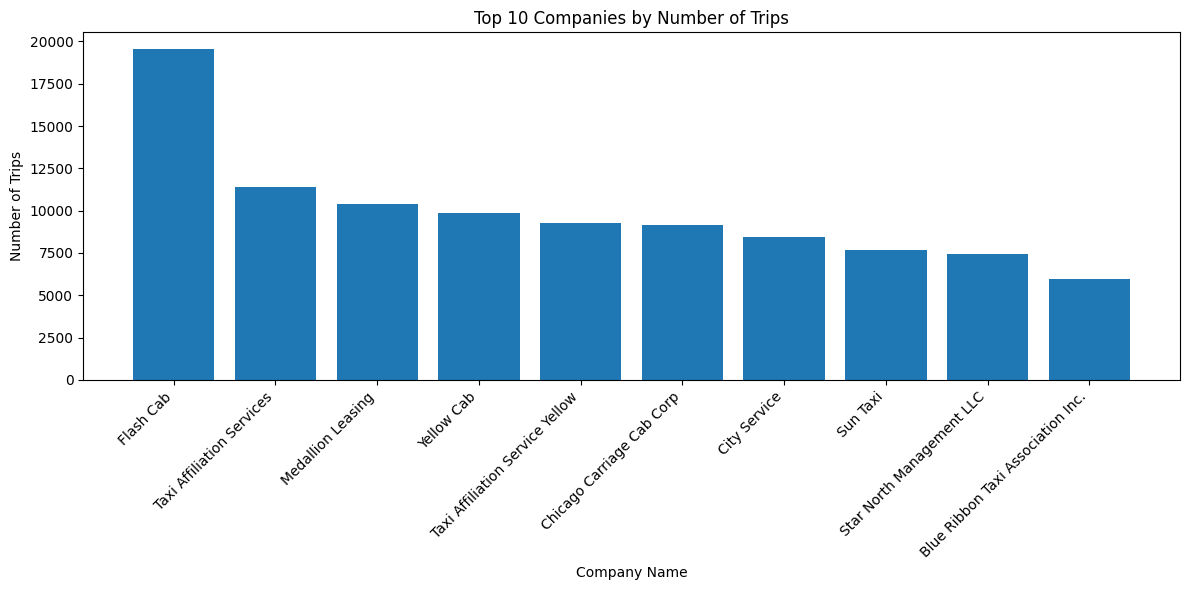

In [ ]:
# Create a bar graph for the top 10 companies based on trips
plt.figure(figsize=(12, 6))
plt.bar(top_10_companies['company_name'], top_10_companies['trips_amount'])
plt.xlabel('Company Name')
plt.ylabel('Number of Trips')
plt.title('Top 10 Companies by Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>⚠️ Reviewer's comment, v. 1</b>
    
Also here you can swap the x and y axes in places so that the names are more readable

### Conclusion for Top 10 Company based of trips

1.Flash Cab Dominates the Market:

Flash Cab is the clear leader in terms of the number of trips, significantly outperforming other companies.

This suggests that Flash Cab has a strong market presence, possibly due to its reliability, customer loyalty, or widespread availability.

2.Strong Performance by Taxi Affiliation Services:

Taxi Affiliation Services and Medallion Leasing also handle a large volume of trips, securing the second and third positions respectively.

These companies likely have well-established networks and a consistent customer base.

3.Yellow Cab Remains Competitive:

Yellow Cab and Taxi Affiliation Service Yellow follow closely, indicating that they are still relevant and trusted service providers despite competition.

4.Market Concentration in Top Companies:

The graph shows a steep decline in the number of trips after the top 3-4 companies, suggesting that a small number of companies dominate the market.

Smaller or less-known companies may struggle to compete with these top players.

5.Potential for Targeted Partnerships or Service Improvements:

The insights could help taxi services and ride-hailing platforms explore partnerships with these high-performing companies or identify areas where smaller companies can improve to gain more market share.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b>
    
Great! We counted the data from files by dropoff_location_name and company_name, sorted the graphs, applied a single color and indicated small conclusions</div>

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b>
    
Also I could recommend you this site, may be you could find smth interesting for visualization skills:

https://www.python-graph-gallery.com/

### TESTING Hypothesis

 Step 1: Define Hypotheses
Null Hypothesis (H₀): There is no significant change in the average duration of rides from the Loop to O'Hare on rainy Saturdays.

Alternative Hypothesis (H₁): The average duration of rides from the Loop to O'Hare on rainy Saturdays is significantly different.

 Step 2: Significance Level (Alpha)
I will set the significance level (α) to 0.05 (5%), which is a common threshold in hypothesis testing. This means there is a 5% probability of rejecting the null hypothesis if it is true.

 Step 3: Prepare and Filter Data
Filter data to include only trips from the Loop to O'Hare.

Separate trips into two groups:

Trips on rainy Saturdays.

Trips on non-rainy Saturdays or other days.

 Step 4: Perform a t-test
Conduct an independent t-test to compare the average trip durations between the two groups.

Determine if the difference is statistically significant.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b>
    
Hypotheses were formulated</div>

In [ ]:
alpha=0.05

# Treat 'Bad' weather conditions as rainy Saturdays
rainy_saturdays = df_Hare[df_Hare['weather_conditions'].str.contains('Bad', case=False, na=False)]

# Get trip durations for both groups
rainy_durations = rainy_saturdays['duration_seconds'].dropna()
non_rainy_durations = df_Hare['duration_seconds'].dropna()

# Perform an independent t-test
t_stat, p_value = ttest_ind(rainy_durations, non_rainy_durations, equal_var=False)

# Check the number of trips in both groups after the update
rainy_saturdays_size = len(rainy_durations)
non_rainy_saturdays_size = len(non_rainy_durations)

rainy_saturdays_size, non_rainy_saturdays_size, t_stat, p_value



(180, 1068, 6.056477994870787, 5.013652852599471e-09)

### Hypothesis Conclusion

Since the p-value is extremely small (5.01e-9), it is much smaller than the commonly used significance level of 0.05.

This means we reject the null hypothesis and conclude that there is a significant difference in the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays compared to non-rainy Saturdays.

### GENERAL Conclusion

1. Company Performance Analysis:
Top Companies by Trip Volume:

Flash Cab is the dominant player, completing the highest number of trips, followed by Taxi Affiliation Services and Medallion Leasing.

A small number of companies account for the majority of trips, indicating that the market is highly concentrated among a few key players.

Implication:

Smaller companies may need to focus on improving service quality or introducing innovative pricing models to compete effectively.

Taxi services and transportation planners could target high-volume companies for potential partnerships or regulatory changes.

 2. Drop-off Location Trends:
High Demand for Central Locations:

The Loop and River North witness the highest drop-off volumes, making them central hubs for transportation.

Locations such as Streeterville and West Loop also experience heavy traffic, with O'Hare International Airport emerging as a major transportation hub.

Implication:

Transportation authorities may need to prioritize improving traffic management and optimizing routes in these high-demand areas.

Taxi companies can explore dynamic pricing models during peak hours or events in these neighborhoods.

 3. Impact of Weather on Ride Duration:
Significant Delay on Rainy Saturdays:

An independent t-test comparing trip durations on rainy Saturdays (bad weather) vs. non-rainy Saturdays (good weather) showed a statistically significant difference in average ride durations.

P-value:
5.01
×
10
−
9
5.01×10
−9
  (far below 0.05), indicating a strong rejection of the null hypothesis.

Trips during bad weather conditions take significantly longer, likely due to slower traffic and unfavorable driving conditions.

Implication:

Transportation services can inform customers about expected delays and adjust estimated arrival times dynamically.

Authorities could consider improving infrastructure or offering alternative routes to mitigate weather-related delays.

 4. Data Cleaning and Preprocessing:
Thorough Data Cleaning Applied:

Duplicate rows and missing values were handled carefully.

Data types were validated, and necessary transformations (e.g., numeric conversions) were performed.

Consistency in Data Treatment:

Both company and drop-off datasets underwent rigorous data cleansing, ensuring consistency and accuracy in analysis.

 5. Key Insights for Business Strategy:
Optimize Resource Allocation:

Allocate more taxis or ride-share drivers to high-demand areas such as the Loop and River North.

Enhance Customer Experience:

Anticipate delays on rainy days and adjust pricing or route recommendations to improve service efficiency.

Competitive Differentiation:

Smaller companies could introduce loyalty programs or targeted promotions to capture market share from dominant companies.

 Final Thoughts:
Today’s analysis provided deep insights into the behavior of taxi rides, company performance, drop-off trends, and the impact of weather on trip durations. These findings can be leveraged by transportation companies, urban planners, and policymakers to optimize services, reduce delays, and improve customer satisfaction.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b>

The entire conclusion is formed brilliantly

<div class="alert alert-danger"; style="border-left: 7px solid red">
<b>⛔️ Reviewer's comment, v. 1</b>

But also, please note that in each research, in addition to intermediate conclusions, there should be a general conclusion on all the work carried out. It is not necessary to reflect all the stages in this conclusion in great detail, it is enough to add the main points.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 2</b>
    
General conclusion looks awesome!

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>Review summary</b>
    
Joshua, the project is great! You have very strong analytical skills, knowledge of research tools and understanding of statistical methods. But still there are a few comments in the project and I will ask you to correct them so that your project becomes even better!
    